### what is EDA?

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process where analysts and data scientists explore the data set to understand its main characteristics before applying any formal modeling techniques. The primary goal of EDA is to gain insights into the data, identify patterns, detect anomalies, test hypotheses, and check assumptions through summary statistics and graphical representations.

#  Understanding the Data


### Import necessary libraries 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading the datasets into pandas dataframe 
- Listings data from Airbnb in New York City (AB_NYC_2019.csv) has been dowloaded from kaggle.

In [2]:
# Use pd.read_csv to read the csv file 
df = pd.read_csv('AB_NYC_2019.csv')  # AB_NYC_2029.CSV is the name of the file that has been saved on the same directory as the running notebook

# Show the sample of the data that picks random array of data from datsets 
df.sample(5) 

#shows the first five rows of the datasets
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [9]:
"""
Remove unnecessary  column from the datasets, which is option depending on datas and requirements. 
It is best to remove to it to reduce the size of our Dataframe
"""

'\nRemove unnecessary  column from the datasets, which is option depending on datas and requirements. \nIt is best to remove to it to reduce the size of our Dataframe\n'

In [3]:
# Check the data types of each columns 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

.info() gives some information such as shape of our datasets which is 16 columns and 48895 enetries in our datatypes. Also, we see there is no missing values in any columns like name, host_name, last_review, review per month


In [10]:
df['name'].isnull().value_counts()

False    48879
True        16
Name: name, dtype: int64

In [11]:
df['host_name'].isnull().value_counts()

False    48874
True        21
Name: host_name, dtype: int64

### Analyzing and Visualizing the Data
##### Categorical Distribution

Finding out the distribution of the Airbnb across different neighbourhood.

In [14]:
hoodgrp_cnt = df['neighbourhood_group'].value_counts()
print(hoodgrp_cnt)



Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64


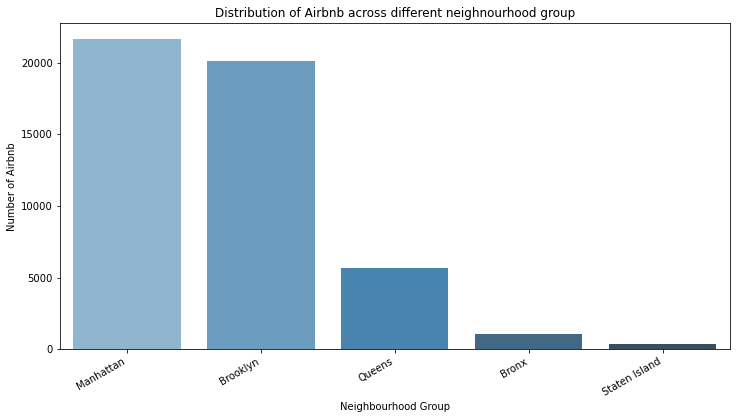

In [16]:
plt.figure(figsize = (12,6))
sns.barplot(x= hoodgrp_cnt.index, y = hoodgrp_cnt.values, palette = 'Blues_d')
plt.title('Distribution of Airbnb across different neighnourhood group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Airbnb')
plt.xticks(rotation = 30, ha = 'right')
plt.show()

Our data is right skewed showing the number airbnb very lower in Queens, Bronx and Staten Island in comparison to the Manhattan and Queens 

Now, lets analyze the distribution of price,minimum_nights, number_of_reviews and availability_365 across each neighbourhood_group by plotting distribution using boxplot.

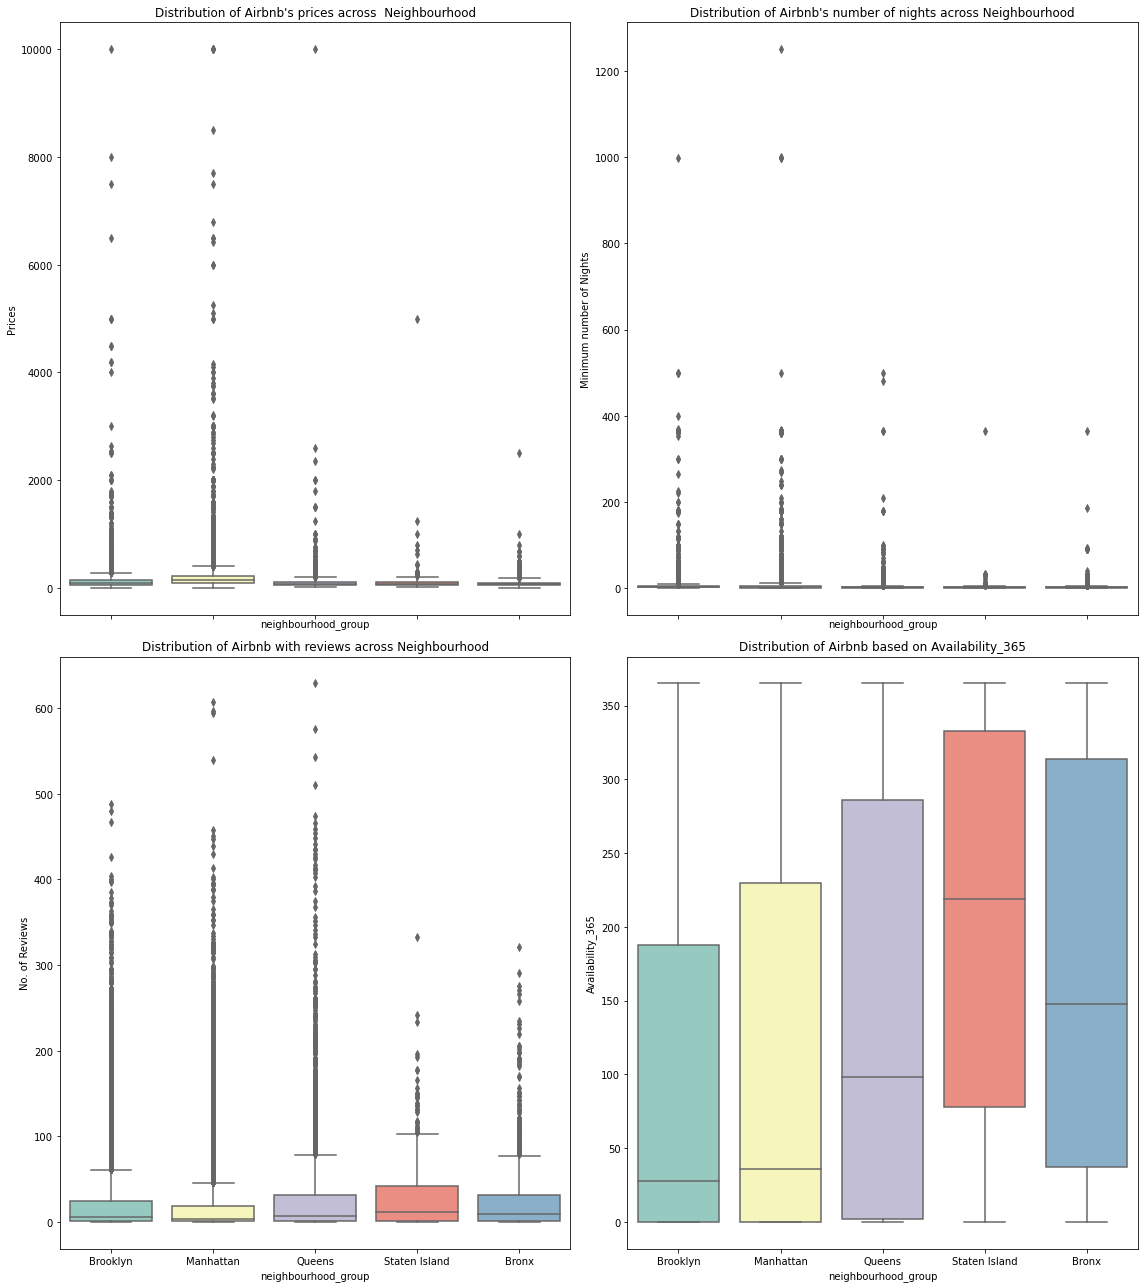

In [18]:
fig, axes = plt.subplots(2,2, figsize = (16,18), sharey = False, sharex = True)

# Plot the distribution of prices of neighbourhood airbnb 
sns.boxplot(data = df, x = 'neighbourhood_group', y = 'price', palette = 'Set3', ax = axes[0,0])
axes[0,0].set_title("Distribution of Airbnb's prices across  Neighbourhood")
axes[0,0].set_ylabel('Prices')


#Plot the distribution of Airbnb's minimum_nights across the neighbourhood Group
sns.boxplot(data = df, x = 'neighbourhood_group', y = 'minimum_nights', palette = 'Set3', ax = axes [0,1])
axes[0,1].set_title("Distribution of Airbnb's number of nights across Neighbourhood")
axes[0,1].set_ylabel('Minimum number of Nights')


#Plot the distribution of Airbnb's no.of reviews across neighbourhood
sns.boxplot(data = df, x = 'neighbourhood_group', y = 'number_of_reviews', palette = 'Set3', ax = axes[1,0])
axes[1,0].set_title("Distribution of Airbnb with reviews across Neighbourhood")
axes[1,0].set_ylabel("No. of Reviews")


# Plot the distribution of Airbnb based on the availability 
sns.boxplot(data = df , x ='neighbourhood_group', y = 'availability_365', palette = 'Set3', ax = axes[1,1])
axes[1,1].set_title("Distribution of Airbnb based on Availability_365")
axes[1,1].set_ylabel("Availability_365")

fig.tight_layout()
plt.show()